In [1]:
import numpy as np
import pandas as pd

In [2]:
churn = pd.read_csv('churn_data.csv'
                    , parse_dates=True)
churn.head()

,customer_id,date,transaction_amount,plan_type,churn,issuing_date
0,CUST_1,2023-01-01,193.524658,Basic,0,2021-03-01
1,CUST_1,2023-02-01,303.342657,Standard,0,2021-03-01
2,CUST_1,2023-03-01,38.460970,Standard,0,2021-03-01
3,CUST_1,2023-04-01,356.955563,Premium,0,2021-03-01
4,CUST_1,2023-05-01,417.896894,Standard,0,2021-03-01


In [3]:
customer_id_factor = pd.factorize(churn.customer_id)
churn['Customer_Id_No'] = customer_id_factor[0]

In [4]:
churn

,customer_id,date,transaction_amount,plan_type,churn,issuing_date,Customer_Id_No
0,CUST_1,2023-01-01,193.524658,Basic,0,2021-03-01,0
1,CUST_1,2023-02-01,303.342657,Standard,0,2021-03-01,0
2,CUST_1,2023-03-01,38.460970,Standard,0,2021-03-01,0
3,CUST_1,2023-04-01,356.955563,Premium,0,2021-03-01,0
4,CUST_1,2023-05-01,417.896894,Standard,0,2021-03-01,0
...,...,...,...,...,...,...,...
1195,CUST_100,2023-08-01,42.616717,Premium,0,2021-07-01,99
1196,CUST_100,2023-09-01,193.979775,Premium,0,2021-07-01,99
1197,CUST_100,2023-10-01,498.619353,Premium,0,2021-07-01,99
1198,CUST_100,2023-11-01,117.854550,Premium,0,2021-07-01,99


In [5]:
churn.plan_type.value_counts()

plan_type
Basic       420
Standard    399
Premium     380
Name: count, dtype: int64

In [6]:
plant_type_factor =  pd.factorize(churn.plan_type)
churn['plan_type_id'] =  plant_type_factor[0]

In [7]:
churn.issuing_date.unique()

array(['2021-03-01', '2018-03-01', '2020-09-01', '2018-07-01',
       '2018-06-01', '2020-10-01', '2021-12-01', '2018-05-01',
       '2022-08-01', '2023-01-01', '2020-03-01', '2020-12-01',
       '2021-01-01', '2022-03-01', '2018-01-01', '2019-06-01',
       '2018-12-01', '2019-07-01', '2019-05-01', '2018-08-01',
       '2020-11-01', '2019-10-01', '2022-05-01', '2022-04-01',
       '2018-02-01', '2022-09-01', '2021-06-01', '2022-07-01',
       '2019-09-01', '2022-11-01', '2018-04-01', '2020-08-01',
       '2019-03-01', '2018-10-01', '2019-01-01', '2020-07-01',
       '2022-02-01', '2019-11-01', '2019-02-01', '2021-11-01',
       '2021-07-01', '2019-08-01', '2020-01-01', '2022-01-01',
       '2019-04-01', '2021-09-01', '2022-10-01', '2021-04-01',
       '2021-10-01', '2018-09-01', '2022-12-01', '2020-06-01',
       '2020-04-01'], dtype=object)

In [8]:
churn.groupby( ['customer_id', 'plan_type'] ).issuing_date.unique()

customer_id  plan_type
CUST_1       Basic        [2021-03-01]
             Premium      [2021-03-01]
             Standard     [2021-03-01]
CUST_10      Basic        [2022-08-01]
             Premium      [2022-08-01]
                              ...     
CUST_98      Premium      [2018-08-01]
             Standard     [2018-08-01]
CUST_99      Basic        [2020-04-01]
             Premium      [2020-04-01]
             Standard     [2020-04-01]
Name: issuing_date, Length: 296, dtype: object

In [9]:
churn.issuing_date = pd.to_datetime(churn.issuing_date)
churn.date = pd.to_datetime(churn.date)
churn['no_days'] = churn.date-churn.issuing_date 
churn['no_days'] = churn.no_days.apply(lambda x: x.days)
churn

,customer_id,date,transaction_amount,plan_type,churn,issuing_date,Customer_Id_No,plan_type_id,no_days
0,CUST_1,2023-01-01,193.524658,Basic,0,2021-03-01,0,0,671
1,CUST_1,2023-02-01,303.342657,Standard,0,2021-03-01,0,1,702
2,CUST_1,2023-03-01,38.460970,Standard,0,2021-03-01,0,1,730
3,CUST_1,2023-04-01,356.955563,Premium,0,2021-03-01,0,2,761
4,CUST_1,2023-05-01,417.896894,Standard,0,2021-03-01,0,1,791
...,...,...,...,...,...,...,...,...,...
1195,CUST_100,2023-08-01,42.616717,Premium,0,2021-07-01,99,2,761
1196,CUST_100,2023-09-01,193.979775,Premium,0,2021-07-01,99,2,792
1197,CUST_100,2023-10-01,498.619353,Premium,0,2021-07-01,99,2,822
1198,CUST_100,2023-11-01,117.854550,Premium,0,2021-07-01,99,2,853


In [10]:
def create_embeding(ids, embeding_dims = 8, random = False, prefix=None):
    rows = len(set(churn.Customer_Id_No))
    
    if random:
        matrix = np.random.normal( size=(rows, embeding_dims) )
    else:
        matrix = np.arange(0, rows*embeding_dims).reshape(rows,embeding_dims)

    
    if prefix is not None:
        columns=list(map(lambda x: prefix+'V_'+str(x), range(embeding_dims))) 
    else:
        columns=list(map(lambda x: 'V_'+str(x), range(embeding_dims))) 
    

    matrix = pd.DataFrame(matrix[ids]
                          , columns=columns)
    
    
    return matrix

In [11]:
df_c_v = create_embeding(ids=churn.Customer_Id_No, prefix='Customer_', random=True)
df_c_v
df = pd.concat([churn, df_c_v], axis=1)
df

,customer_id,date,transaction_amount,plan_type,churn,issuing_date,Customer_Id_No,plan_type_id,no_days,Customer_V_0,Customer_V_1,Customer_V_2,Customer_V_3,Customer_V_4,Customer_V_5,Customer_V_6,Customer_V_7
0,CUST_1,2023-01-01,193.524658,Basic,0,2021-03-01,0,0,671,-0.544050,0.914838,-0.820167,-0.529001,2.292195,0.085368,-0.898427,0.350711
1,CUST_1,2023-02-01,303.342657,Standard,0,2021-03-01,0,1,702,-0.544050,0.914838,-0.820167,-0.529001,2.292195,0.085368,-0.898427,0.350711
2,CUST_1,2023-03-01,38.460970,Standard,0,2021-03-01,0,1,730,-0.544050,0.914838,-0.820167,-0.529001,2.292195,0.085368,-0.898427,0.350711
3,CUST_1,2023-04-01,356.955563,Premium,0,2021-03-01,0,2,761,-0.544050,0.914838,-0.820167,-0.529001,2.292195,0.085368,-0.898427,0.350711
4,CUST_1,2023-05-01,417.896894,Standard,0,2021-03-01,0,1,791,-0.544050,0.914838,-0.820167,-0.529001,2.292195,0.085368,-0.898427,0.350711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,CUST_100,2023-08-01,42.616717,Premium,0,2021-07-01,99,2,761,1.263666,-1.177176,2.924757,-0.639334,1.736184,-0.645113,-1.788768,0.035775
1196,CUST_100,2023-09-01,193.979775,Premium,0,2021-07-01,99,2,792,1.263666,-1.177176,2.924757,-0.639334,1.736184,-0.645113,-1.788768,0.035775
1197,CUST_100,2023-10-01,498.619353,Premium,0,2021-07-01,99,2,822,1.263666,-1.177176,2.924757,-0.639334,1.736184,-0.645113,-1.788768,0.035775
1198,CUST_100,2023-11-01,117.854550,Premium,0,2021-07-01,99,2,853,1.263666,-1.177176,2.924757,-0.639334,1.736184,-0.645113,-1.788768,0.035775


In [12]:
df_p_v = create_embeding(ids=churn.plan_type_id, prefix='Plan_Type_', random=True)
df = pd.concat([df, df_p_v], axis=1)
df

,customer_id,date,transaction_amount,plan_type,churn,issuing_date,Customer_Id_No,plan_type_id,no_days,Customer_V_0,...,Customer_V_6,Customer_V_7,Plan_Type_V_0,Plan_Type_V_1,Plan_Type_V_2,Plan_Type_V_3,Plan_Type_V_4,Plan_Type_V_5,Plan_Type_V_6,Plan_Type_V_7
0,CUST_1,2023-01-01,193.524658,Basic,0,2021-03-01,0,0,671,-0.544050,...,-0.898427,0.350711,-0.143785,1.338194,0.267142,0.253781,-1.899749,0.049528,-0.731708,0.909947
1,CUST_1,2023-02-01,303.342657,Standard,0,2021-03-01,0,1,702,-0.544050,...,-0.898427,0.350711,-1.571650,-0.287006,0.041722,0.226838,-1.301382,-0.042910,0.038377,1.194059
2,CUST_1,2023-03-01,38.460970,Standard,0,2021-03-01,0,1,730,-0.544050,...,-0.898427,0.350711,-1.571650,-0.287006,0.041722,0.226838,-1.301382,-0.042910,0.038377,1.194059
3,CUST_1,2023-04-01,356.955563,Premium,0,2021-03-01,0,2,761,-0.544050,...,-0.898427,0.350711,-1.563113,-2.062827,0.321873,0.565333,0.043208,0.631749,1.079187,0.187920
4,CUST_1,2023-05-01,417.896894,Standard,0,2021-03-01,0,1,791,-0.544050,...,-0.898427,0.350711,-1.571650,-0.287006,0.041722,0.226838,-1.301382,-0.042910,0.038377,1.194059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,CUST_100,2023-08-01,42.616717,Premium,0,2021-07-01,99,2,761,1.263666,...,-1.788768,0.035775,-1.563113,-2.062827,0.321873,0.565333,0.043208,0.631749,1.079187,0.187920
1196,CUST_100,2023-09-01,193.979775,Premium,0,2021-07-01,99,2,792,1.263666,...,-1.788768,0.035775,-1.563113,-2.062827,0.321873,0.565333,0.043208,0.631749,1.079187,0.187920
1197,CUST_100,2023-10-01,498.619353,Premium,0,2021-07-01,99,2,822,1.263666,...,-1.788768,0.035775,-1.563113,-2.062827,0.321873,0.565333,0.043208,0.631749,1.079187,0.187920
1198,CUST_100,2023-11-01,117.854550,Premium,0,2021-07-01,99,2,853,1.263666,...,-1.788768,0.035775,-1.563113,-2.062827,0.321873,0.565333,0.043208,0.631749,1.079187,0.187920


In [13]:
df = df.drop( 'customer_id date plan_type issuing_date Customer_Id_No plan_type_id'.split(), axis=1 )
df

,transaction_amount,churn,no_days,Customer_V_0,Customer_V_1,Customer_V_2,Customer_V_3,Customer_V_4,Customer_V_5,Customer_V_6,Customer_V_7,Plan_Type_V_0,Plan_Type_V_1,Plan_Type_V_2,Plan_Type_V_3,Plan_Type_V_4,Plan_Type_V_5,Plan_Type_V_6,Plan_Type_V_7
0,193.524658,0,671,-0.544050,0.914838,-0.820167,-0.529001,2.292195,0.085368,-0.898427,0.350711,-0.143785,1.338194,0.267142,0.253781,-1.899749,0.049528,-0.731708,0.909947
1,303.342657,0,702,-0.544050,0.914838,-0.820167,-0.529001,2.292195,0.085368,-0.898427,0.350711,-1.571650,-0.287006,0.041722,0.226838,-1.301382,-0.042910,0.038377,1.194059
2,38.460970,0,730,-0.544050,0.914838,-0.820167,-0.529001,2.292195,0.085368,-0.898427,0.350711,-1.571650,-0.287006,0.041722,0.226838,-1.301382,-0.042910,0.038377,1.194059
3,356.955563,0,761,-0.544050,0.914838,-0.820167,-0.529001,2.292195,0.085368,-0.898427,0.350711,-1.563113,-2.062827,0.321873,0.565333,0.043208,0.631749,1.079187,0.187920
4,417.896894,0,791,-0.544050,0.914838,-0.820167,-0.529001,2.292195,0.085368,-0.898427,0.350711,-1.571650,-0.287006,0.041722,0.226838,-1.301382,-0.042910,0.038377,1.194059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,42.616717,0,761,1.263666,-1.177176,2.924757,-0.639334,1.736184,-0.645113,-1.788768,0.035775,-1.563113,-2.062827,0.321873,0.565333,0.043208,0.631749,1.079187,0.187920
1196,193.979775,0,792,1.263666,-1.177176,2.924757,-0.639334,1.736184,-0.645113,-1.788768,0.035775,-1.563113,-2.062827,0.321873,0.565333,0.043208,0.631749,1.079187,0.187920
1197,498.619353,0,822,1.263666,-1.177176,2.924757,-0.639334,1.736184,-0.645113,-1.788768,0.035775,-1.563113,-2.062827,0.321873,0.565333,0.043208,0.631749,1.079187,0.187920
1198,117.854550,0,853,1.263666,-1.177176,2.924757,-0.639334,1.736184,-0.645113,-1.788768,0.035775,-1.563113,-2.062827,0.321873,0.565333,0.043208,0.631749,1.079187,0.187920


In [14]:
df.isna().mean() 

transaction_amount    0.005833
churn                 0.000000
no_days               0.000000
Customer_V_0          0.000000
Customer_V_1          0.000000
Customer_V_2          0.000000
Customer_V_3          0.000000
Customer_V_4          0.000000
Customer_V_5          0.000000
Customer_V_6          0.000000
Customer_V_7          0.000000
Plan_Type_V_0         0.000000
Plan_Type_V_1         0.000000
Plan_Type_V_2         0.000000
Plan_Type_V_3         0.000000
Plan_Type_V_4         0.000000
Plan_Type_V_5         0.000000
Plan_Type_V_6         0.000000
Plan_Type_V_7         0.000000
dtype: float64

In [15]:
df.churn.value_counts()

churn
0    863
1    337
Name: count, dtype: int64

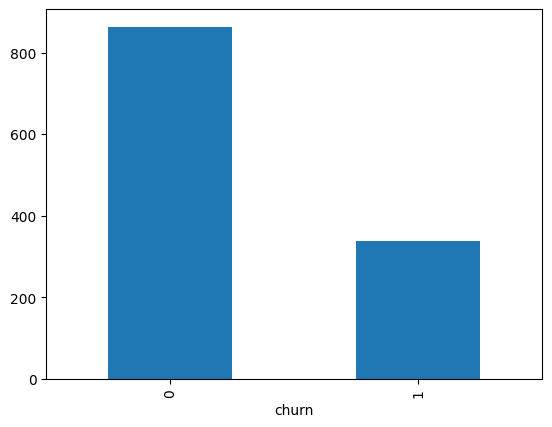

In [16]:
df.churn.value_counts().plot.bar();

<Axes: ylabel='Frequency'>

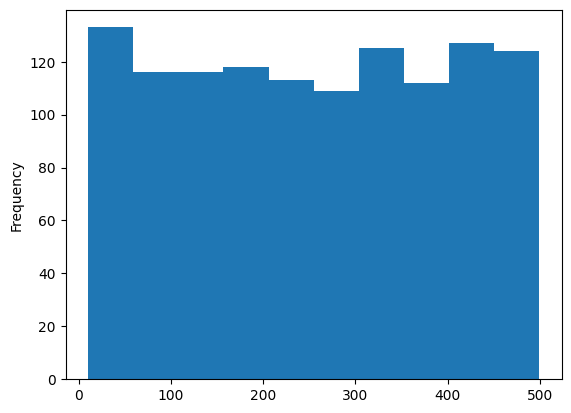

In [17]:
df.transaction_amount.plot.hist()

In [18]:
df

,transaction_amount,churn,no_days,Customer_V_0,Customer_V_1,Customer_V_2,Customer_V_3,Customer_V_4,Customer_V_5,Customer_V_6,Customer_V_7,Plan_Type_V_0,Plan_Type_V_1,Plan_Type_V_2,Plan_Type_V_3,Plan_Type_V_4,Plan_Type_V_5,Plan_Type_V_6,Plan_Type_V_7
0,193.524658,0,671,-0.544050,0.914838,-0.820167,-0.529001,2.292195,0.085368,-0.898427,0.350711,-0.143785,1.338194,0.267142,0.253781,-1.899749,0.049528,-0.731708,0.909947
1,303.342657,0,702,-0.544050,0.914838,-0.820167,-0.529001,2.292195,0.085368,-0.898427,0.350711,-1.571650,-0.287006,0.041722,0.226838,-1.301382,-0.042910,0.038377,1.194059
2,38.460970,0,730,-0.544050,0.914838,-0.820167,-0.529001,2.292195,0.085368,-0.898427,0.350711,-1.571650,-0.287006,0.041722,0.226838,-1.301382,-0.042910,0.038377,1.194059
3,356.955563,0,761,-0.544050,0.914838,-0.820167,-0.529001,2.292195,0.085368,-0.898427,0.350711,-1.563113,-2.062827,0.321873,0.565333,0.043208,0.631749,1.079187,0.187920
4,417.896894,0,791,-0.544050,0.914838,-0.820167,-0.529001,2.292195,0.085368,-0.898427,0.350711,-1.571650,-0.287006,0.041722,0.226838,-1.301382,-0.042910,0.038377,1.194059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,42.616717,0,761,1.263666,-1.177176,2.924757,-0.639334,1.736184,-0.645113,-1.788768,0.035775,-1.563113,-2.062827,0.321873,0.565333,0.043208,0.631749,1.079187,0.187920
1196,193.979775,0,792,1.263666,-1.177176,2.924757,-0.639334,1.736184,-0.645113,-1.788768,0.035775,-1.563113,-2.062827,0.321873,0.565333,0.043208,0.631749,1.079187,0.187920
1197,498.619353,0,822,1.263666,-1.177176,2.924757,-0.639334,1.736184,-0.645113,-1.788768,0.035775,-1.563113,-2.062827,0.321873,0.565333,0.043208,0.631749,1.079187,0.187920
1198,117.854550,0,853,1.263666,-1.177176,2.924757,-0.639334,1.736184,-0.645113,-1.788768,0.035775,-1.563113,-2.062827,0.321873,0.565333,0.043208,0.631749,1.079187,0.187920


In [19]:
X = df.drop('churn', axis=1)
y = df.churn

In [20]:
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import silhouette_score, classification_report
from sklearn.cluster import KMeans

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [22]:
X_test

,transaction_amount,no_days,Customer_V_0,Customer_V_1,Customer_V_2,Customer_V_3,Customer_V_4,Customer_V_5,Customer_V_6,Customer_V_7,Plan_Type_V_0,Plan_Type_V_1,Plan_Type_V_2,Plan_Type_V_3,Plan_Type_V_4,Plan_Type_V_5,Plan_Type_V_6,Plan_Type_V_7
202,386.803833,1614,-0.776182,0.440235,-0.692202,-0.590551,-0.214598,0.429085,-0.400399,0.154234,-1.563113,-2.062827,0.321873,0.565333,0.043208,0.631749,1.079187,0.187920
1041,473.763691,548,-0.612537,2.153625,-0.261704,0.598272,0.873213,-0.604309,0.886082,-1.315780,-1.563113,-2.062827,0.321873,0.565333,0.043208,0.631749,1.079187,0.187920
909,209.716262,457,-0.772584,-0.811047,-0.964285,-1.131011,-0.536738,-1.740781,-0.287854,0.461286,-1.571650,-0.287006,0.041722,0.226838,-1.301382,-0.042910,0.038377,1.194059
173,295.850695,457,0.367113,-0.759122,-0.257596,0.438255,-0.278305,-0.044942,-0.157882,0.291824,-0.143785,1.338194,0.267142,0.253781,-1.899749,0.049528,-0.731708,0.909947
33,41.143592,1125,2.130342,-0.263077,-0.186696,-0.071531,-0.773195,-0.267507,-0.571389,-0.151616,-0.143785,1.338194,0.267142,0.253781,-1.899749,0.049528,-0.731708,0.909947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,182.949667,1675,0.054217,0.339398,0.083045,1.163616,-0.922567,0.725522,-0.759109,-0.462760,-1.563113,-2.062827,0.321873,0.565333,0.043208,0.631749,1.079187,0.187920
685,369.072757,1645,0.495626,0.534392,-0.322558,2.179675,0.571071,0.434936,-1.632070,-0.676649,-1.563113,-2.062827,0.321873,0.565333,0.043208,0.631749,1.079187,0.187920
415,137.279354,2038,1.032011,-0.237826,0.311775,1.032689,-1.065626,1.658772,0.373278,-0.312692,-0.143785,1.338194,0.267142,0.253781,-1.899749,0.049528,-0.731708,0.909947
1133,339.707118,1095,-0.031698,0.933120,-1.118042,1.192511,0.592332,0.189930,-1.113003,0.196190,-0.143785,1.338194,0.267142,0.253781,-1.899749,0.049528,-0.731708,0.909947


In [23]:
def find_optimal_clusters(df, algorithm=KMeans(), max_clusters=10):
    """
    Determine the optimal number of clusters using the Silhouette Score.

    Parameters:
        df (pd.DataFrame): Input dataset.
        algorithm (sklearn.cluster.BaseEstimator): Clustering algorithm to use. Defaults to KMeans().
        max_clusters (int, optional): Maximum number of clusters to consider. Defaults to 10.

    Returns:
        int: Optimal number of clusters for the given dataset.
    """

    # Initialize the optimal score and the optimal number of clusters
    best_score = -1
    optimal_n_clusters = None

    # Try out all possible numbers of clusters from 2 to max_clusters
    for n_clusters in range(2, max_clusters + 1):
        algorithm.n_clusters = n_clusters
        labels = algorithm.fit_predict(df)
        score = silhouette_score(df, labels)

        # Update the optimal score and the optimal number of clusters if necessary
        if score > best_score:
            best_score = score
            optimal_n_clusters = n_clusters

    return optimal_n_clusters

In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
imputer = KNNImputer()
X_train_scaled = imputer.fit_transform(X_train_scaled)
find_optimal_clusters(df=X_train_scaled)

2

In [25]:
pipe_clustering = Pipeline(steps=[
    ( 'scaler', StandardScaler() )
    , ('imputer', KNNImputer())
    , ('kmeans', KMeans(n_clusters=3))

])

In [26]:
X_train['cluster'] = pipe_clustering.fit_predict(X_train)
X_test['cluster'] = pipe_clustering.predict(X_test)

In [27]:
pipe = Pipeline(steps=[
    ( 'scaler', StandardScaler() )
    , ('imputer', KNNImputer())
    , ('estimator', RandomForestClassifier(n_estimators=1000))

])

In [28]:
precision_score = cross_validate(estimator=pipe, X=X_train, y=y_train,cv=10, n_jobs=-1, scoring='precision')
recall_score = cross_validate(estimator=pipe, X=X_train, y=y_train,cv=10, n_jobs=-1, scoring='recall')

In [29]:
precision_score['test_score'].mean(), recall_score['test_score'].mean()
# (np.float64(0.8077744423598082), np.float64(0.7422322775263952)) non random embeding
# (np.float64(0.7934519262250355), np.float64(0.7591020408163265)) random embeding

(np.float64(0.8332271062271064), np.float64(0.8300000000000001))

In [30]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('imputer', KNNImputer()),
                ('estimator', RandomForestClassifier(n_estimators=1000))])

In [31]:
y_pred = pipe.predict(X_test)

In [32]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       221
           1       0.78      0.81      0.80        79

    accuracy                           0.89       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.89      0.89      0.89       300



In [115]:
max_val = dep['grid_values'][0].max()
min_val = dep['grid_values'][0].min()

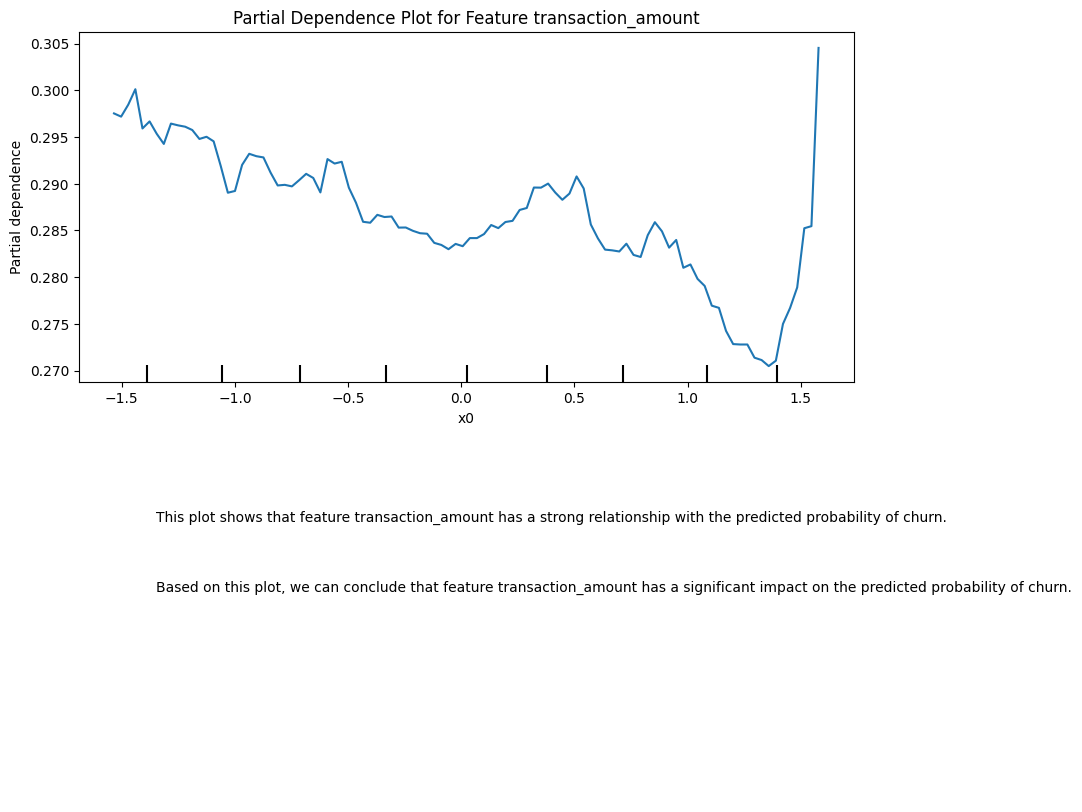

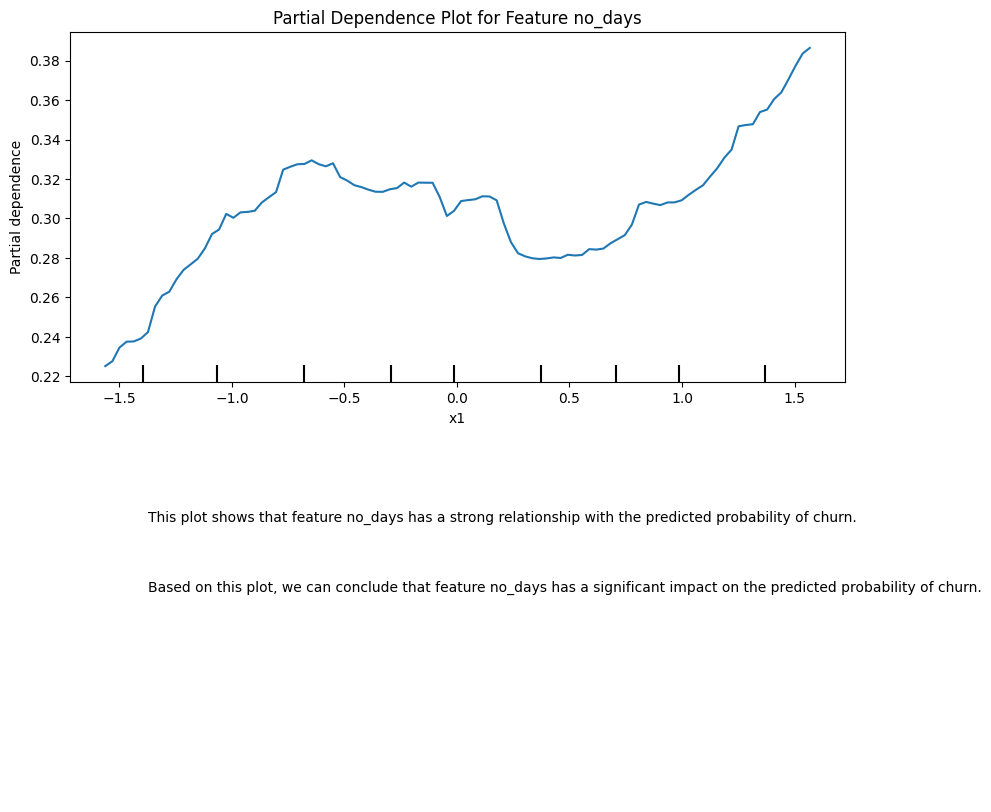

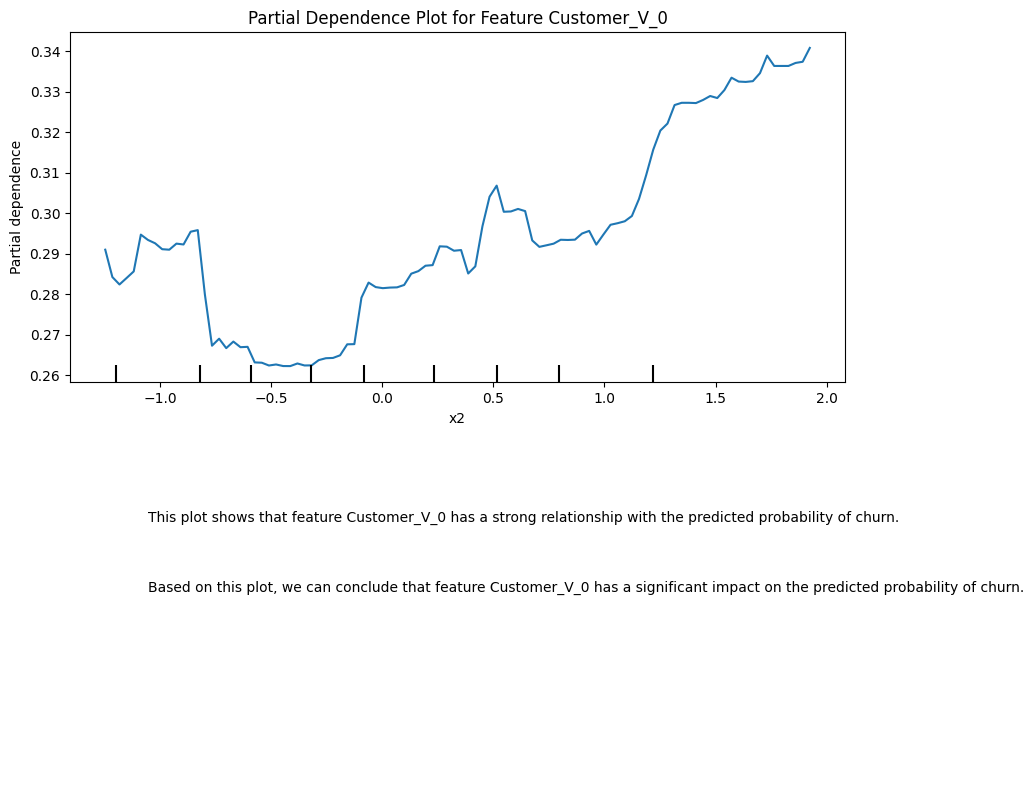

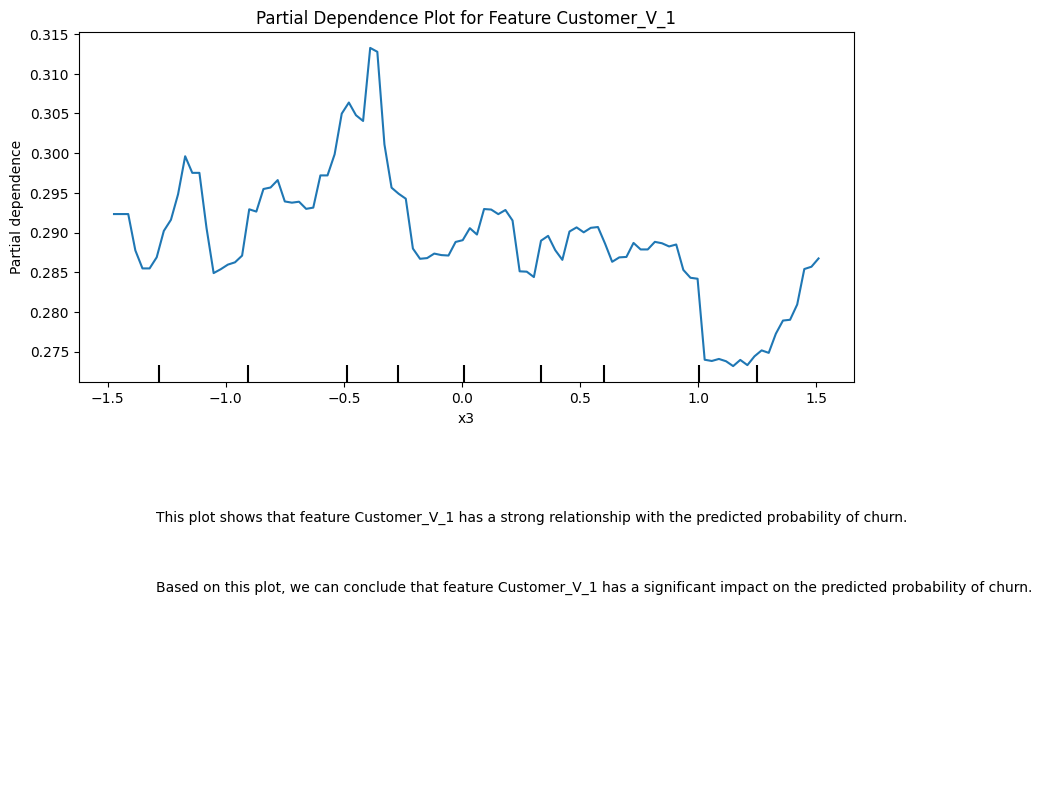

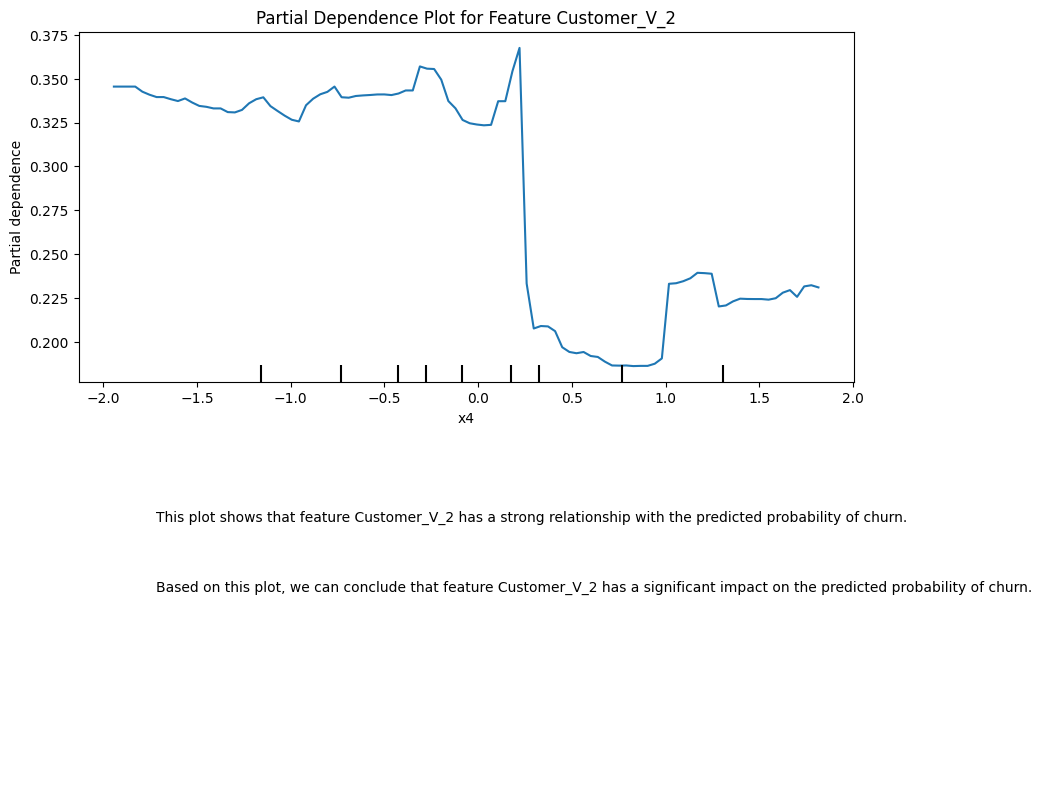

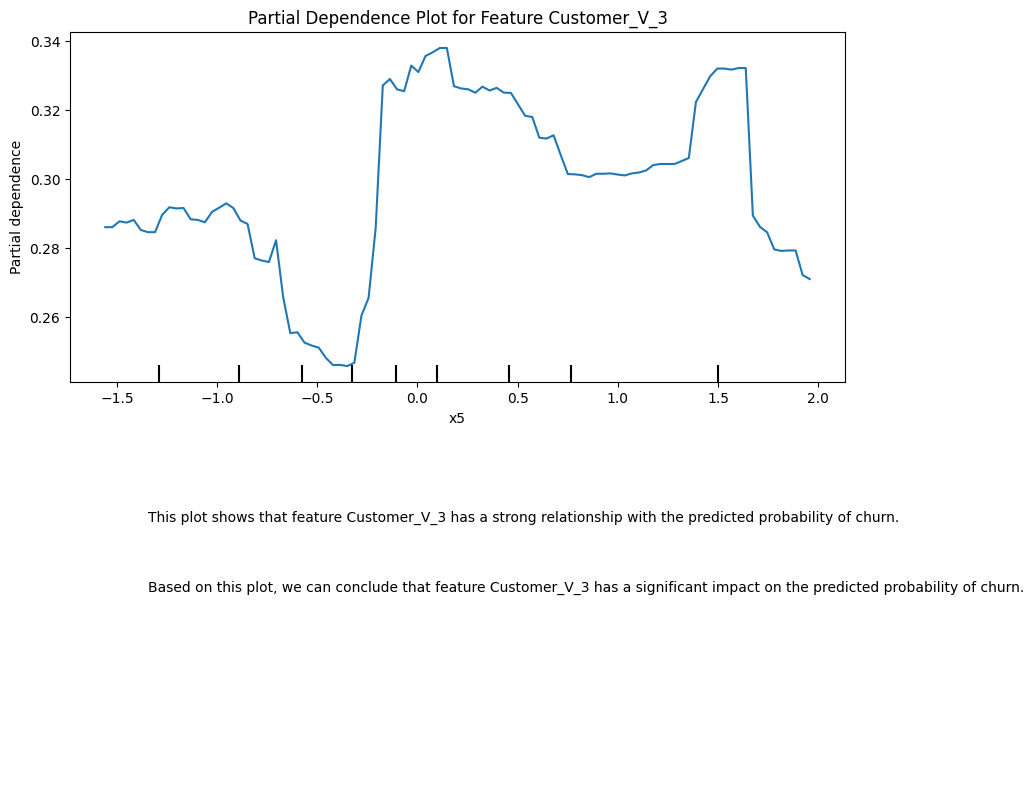

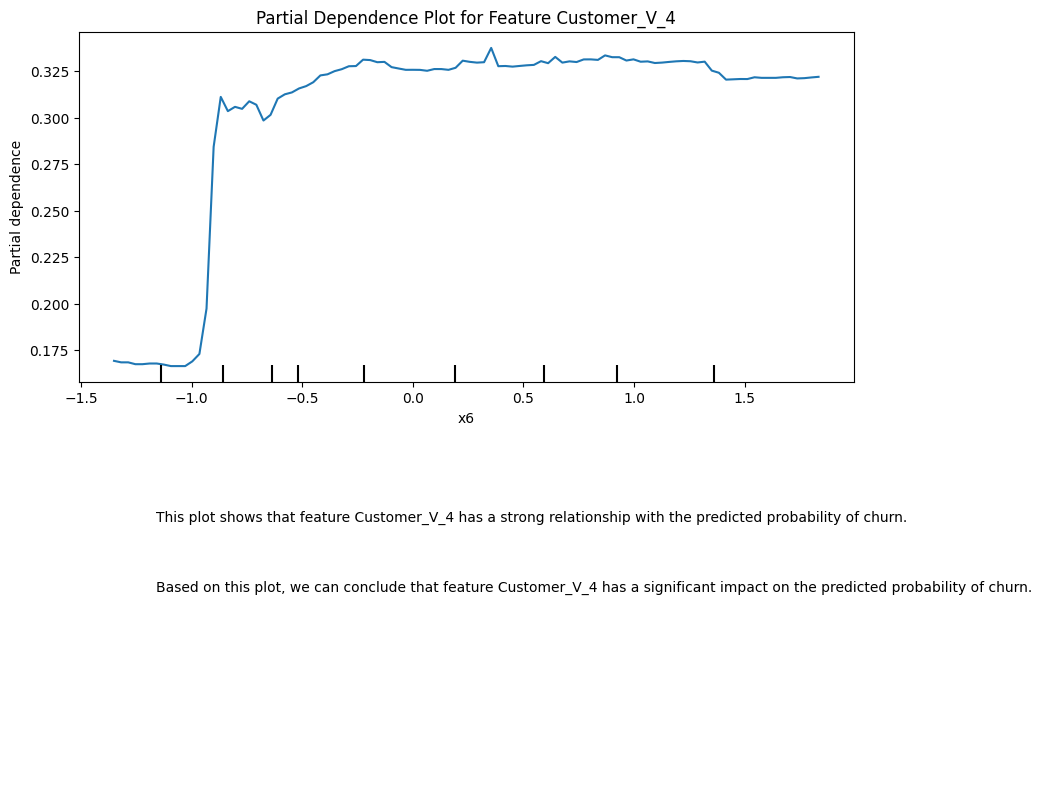

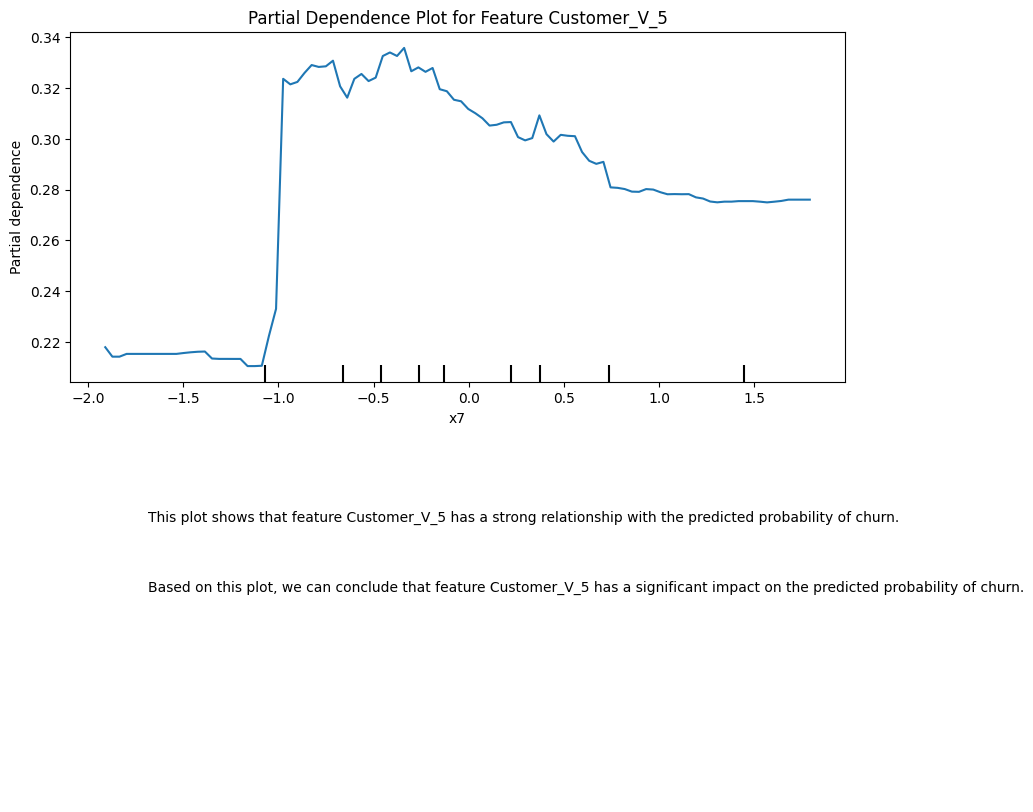

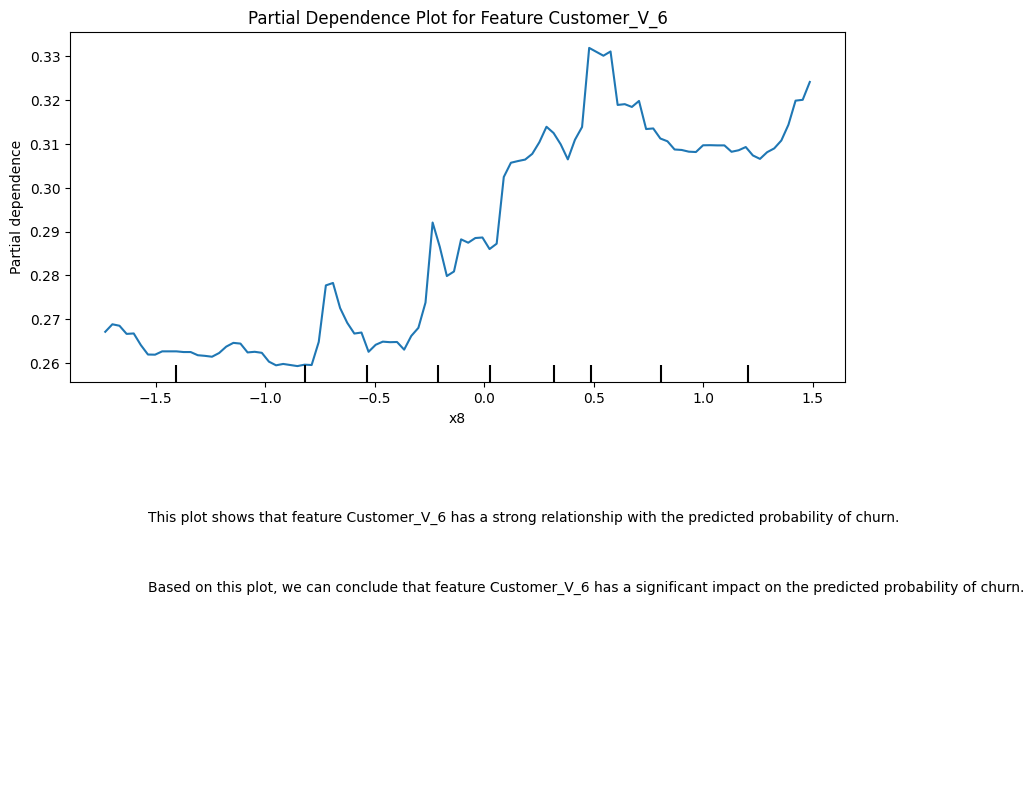

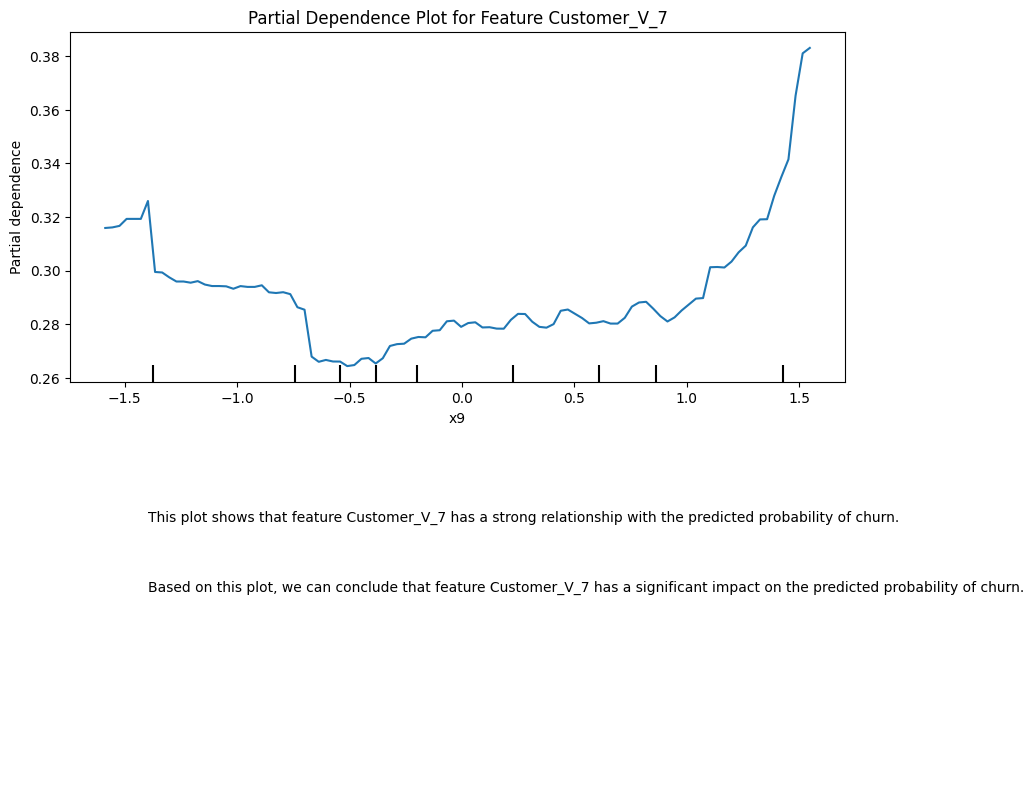

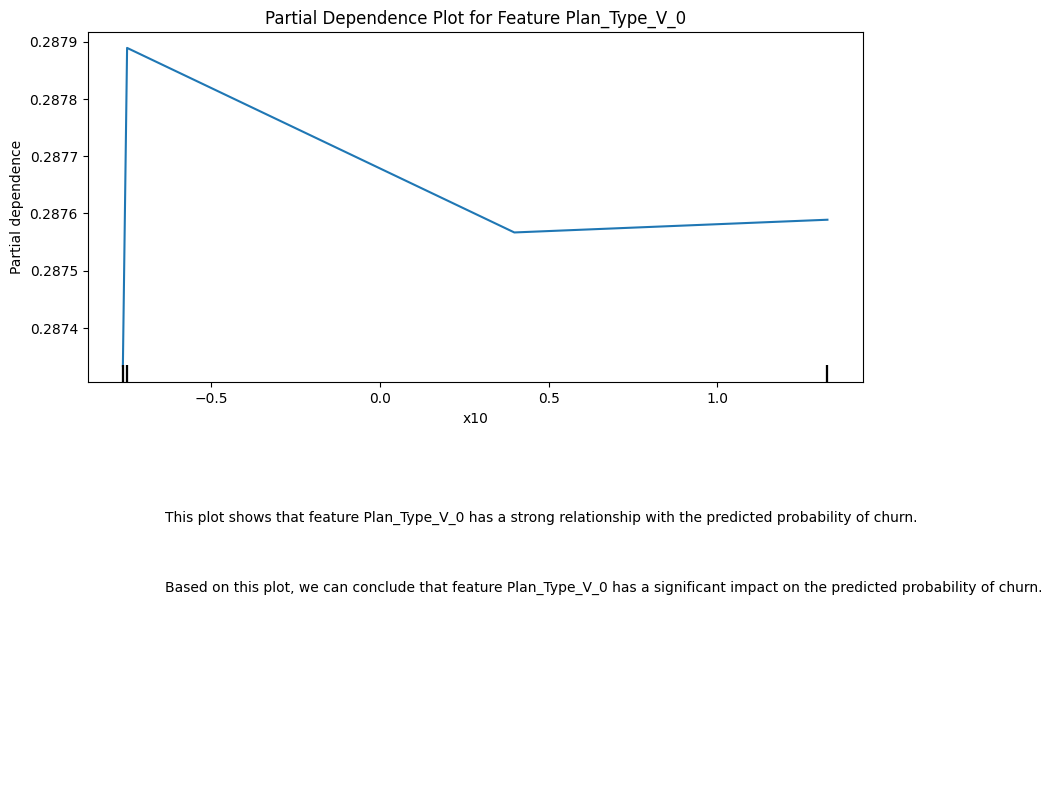

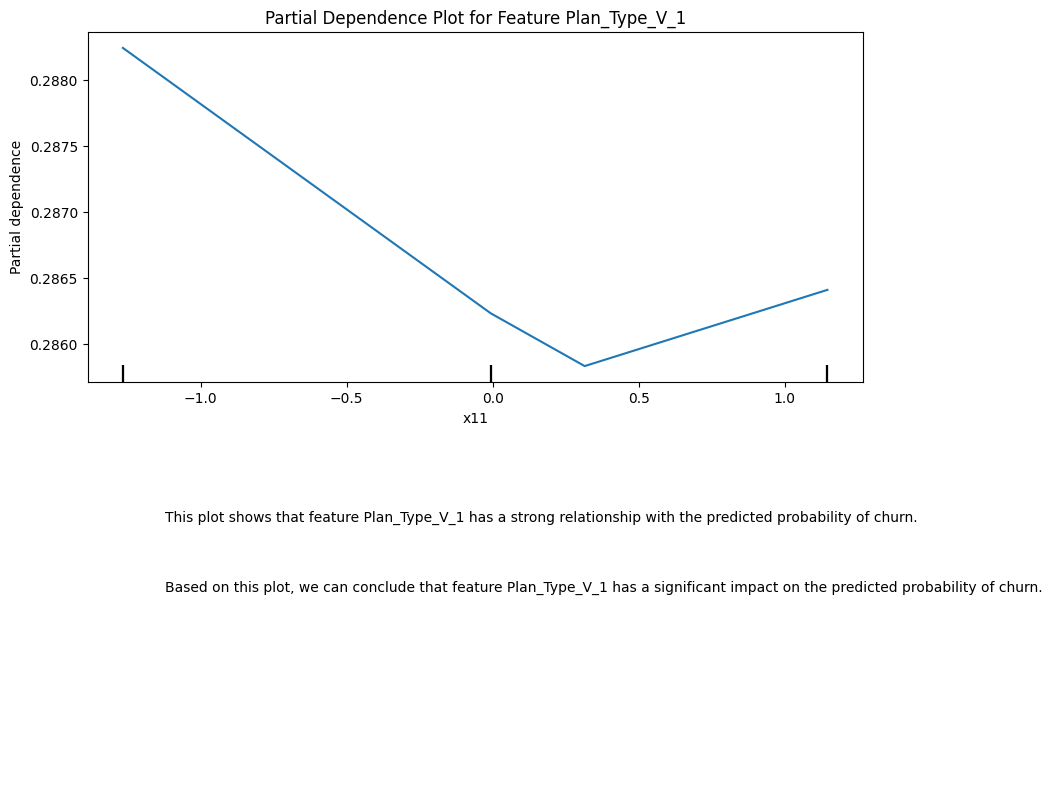

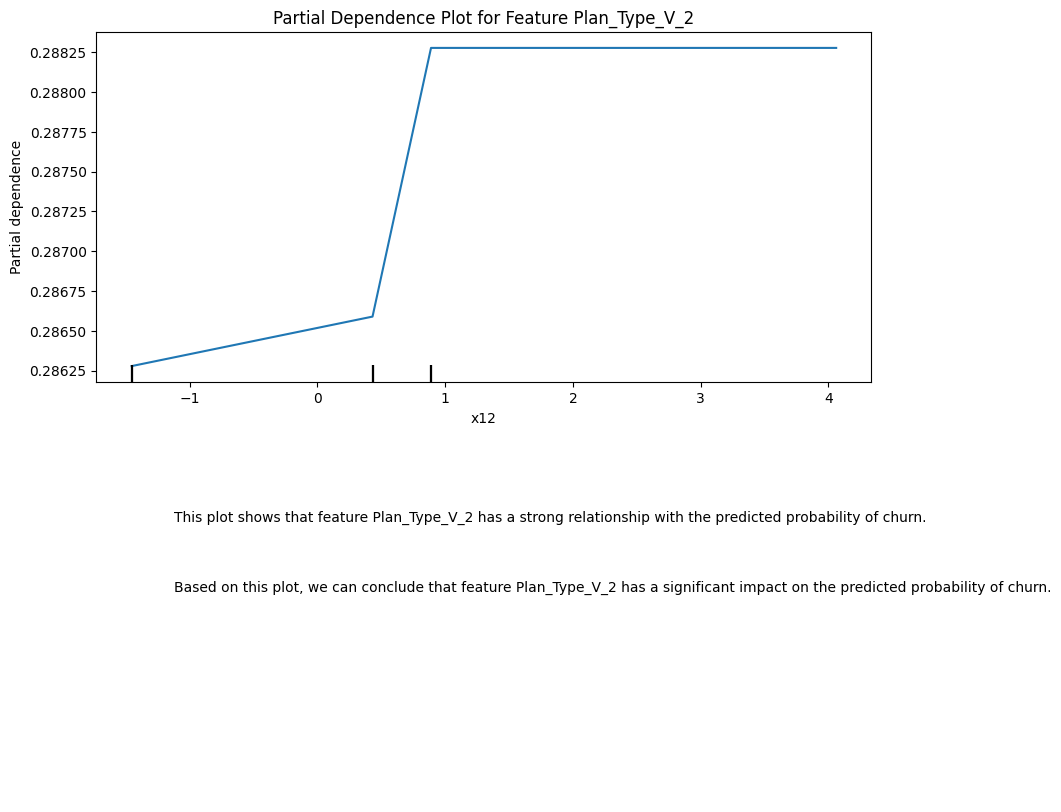

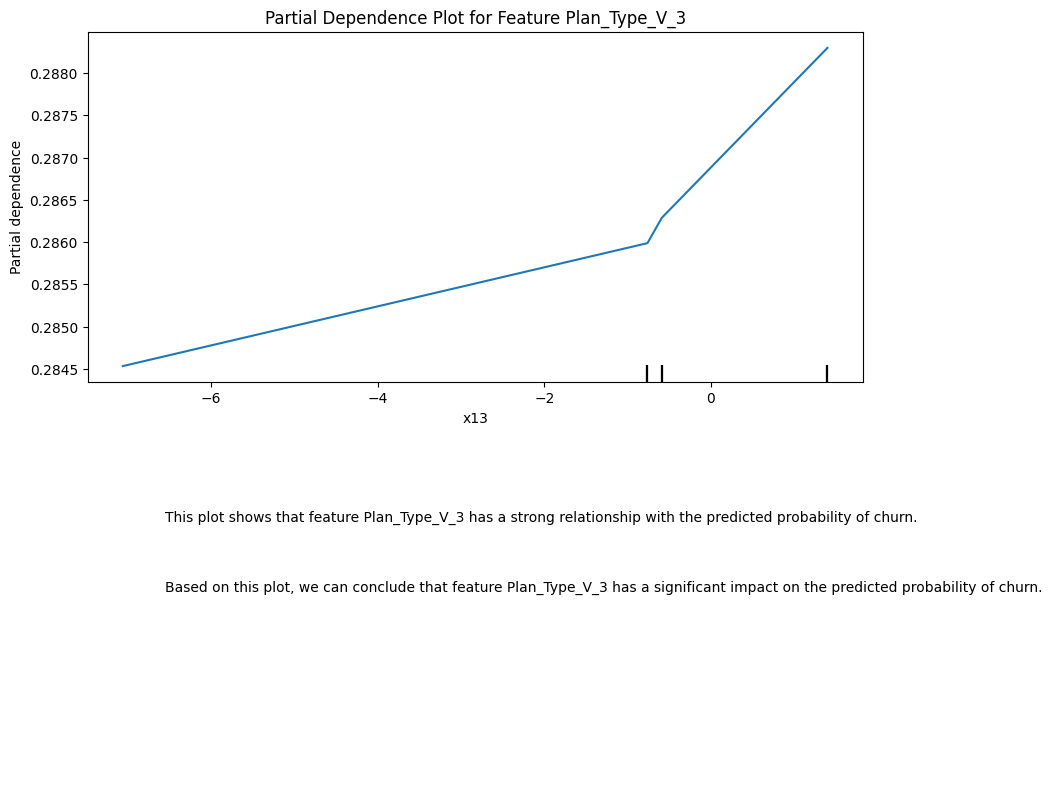

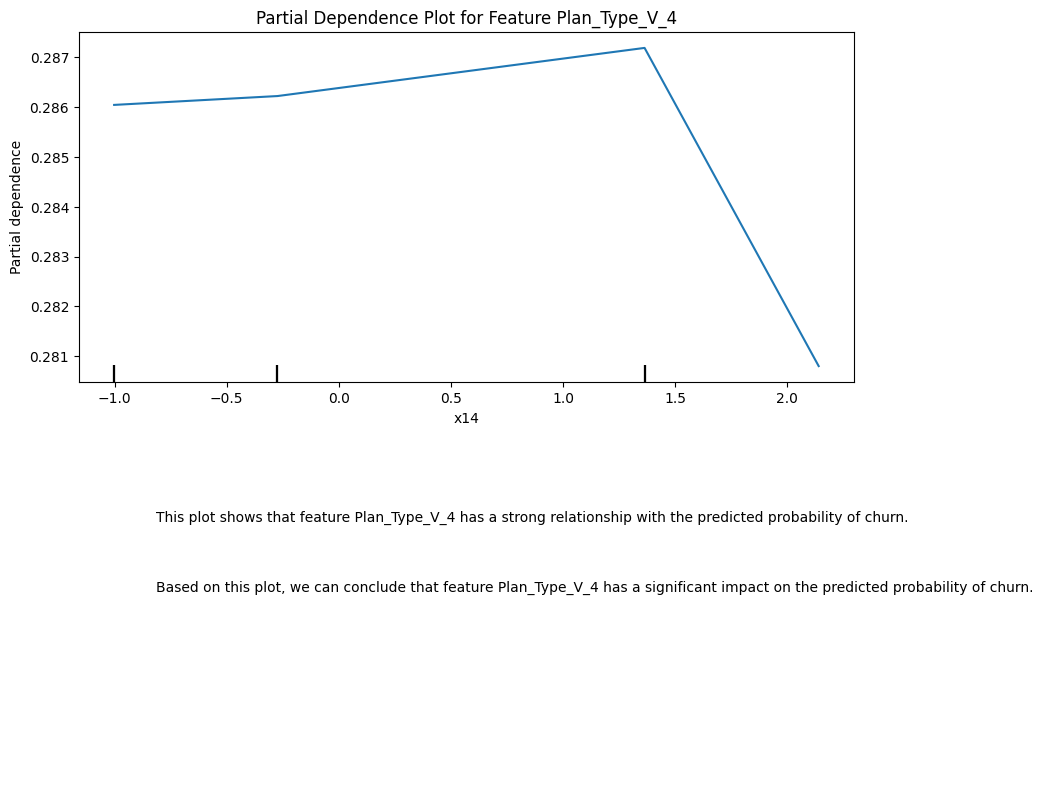

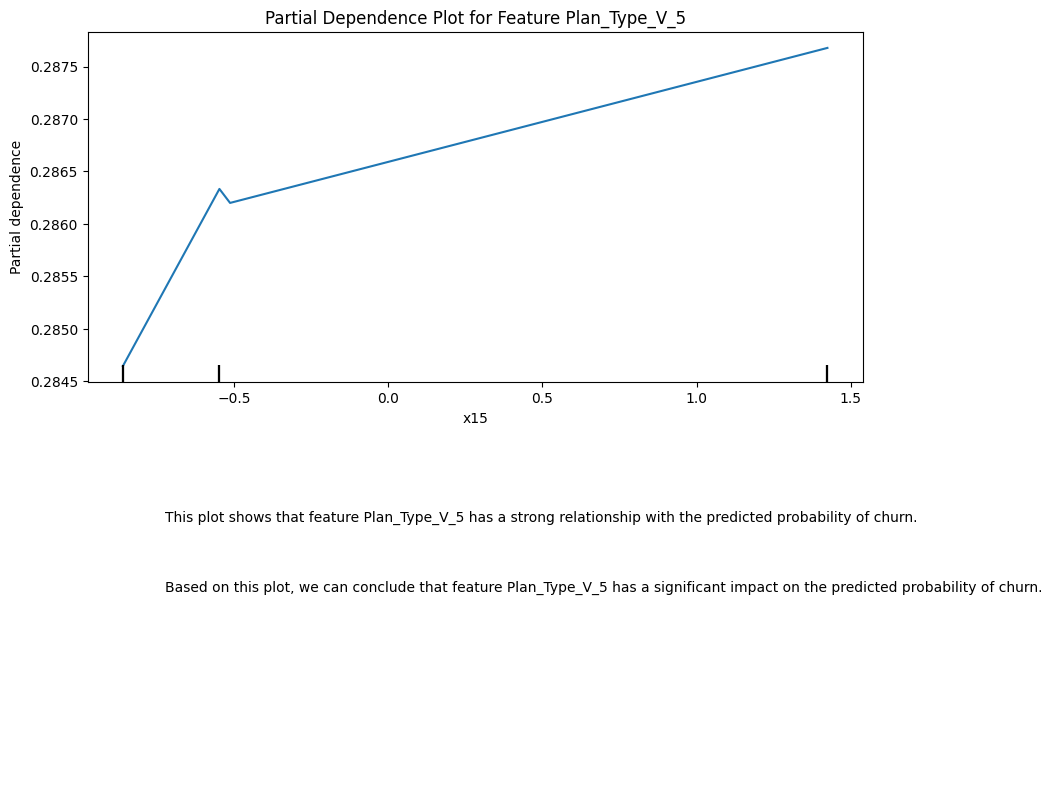

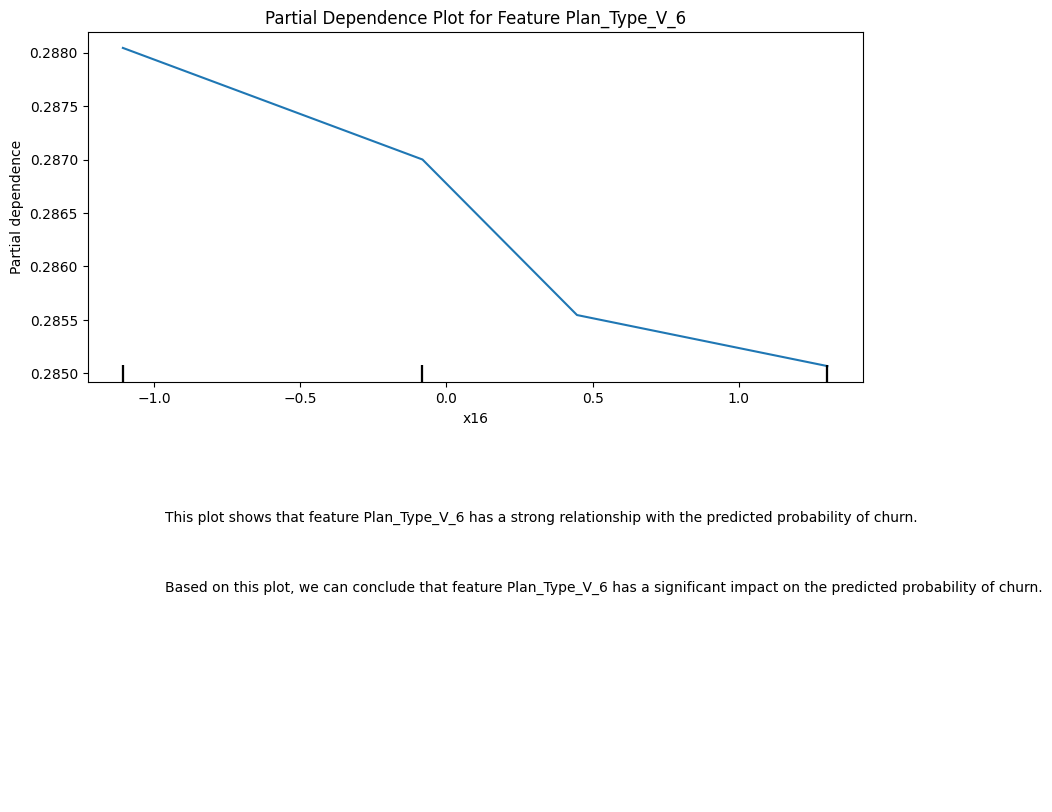

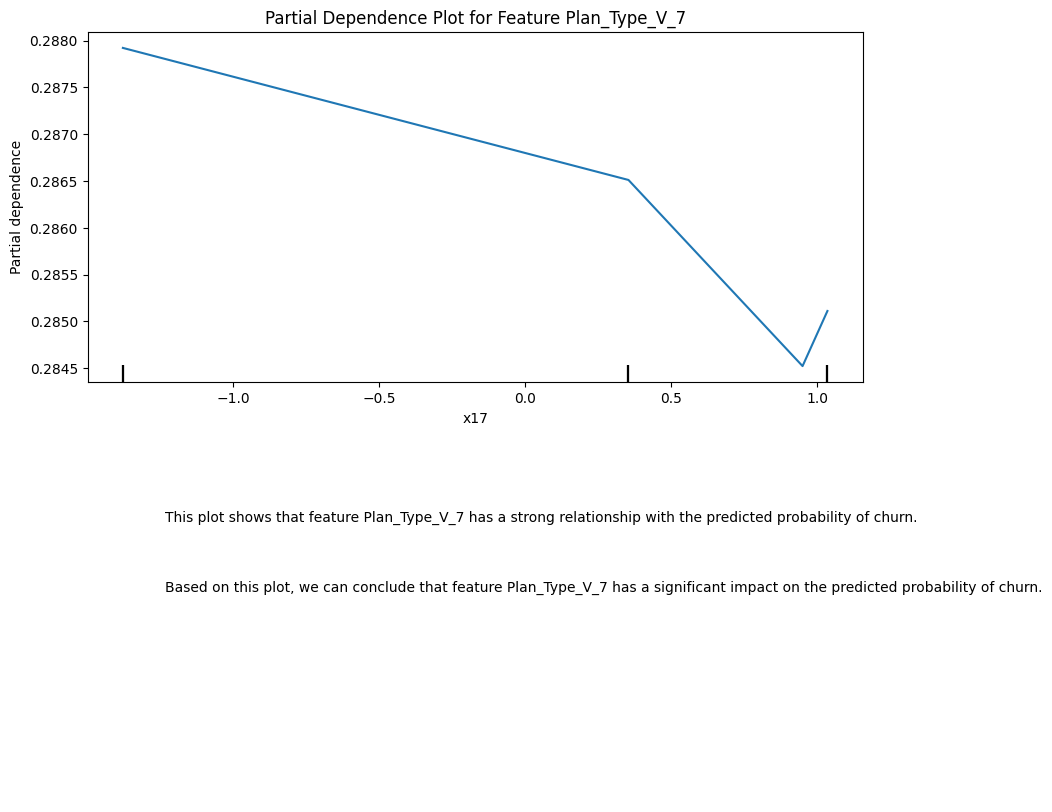

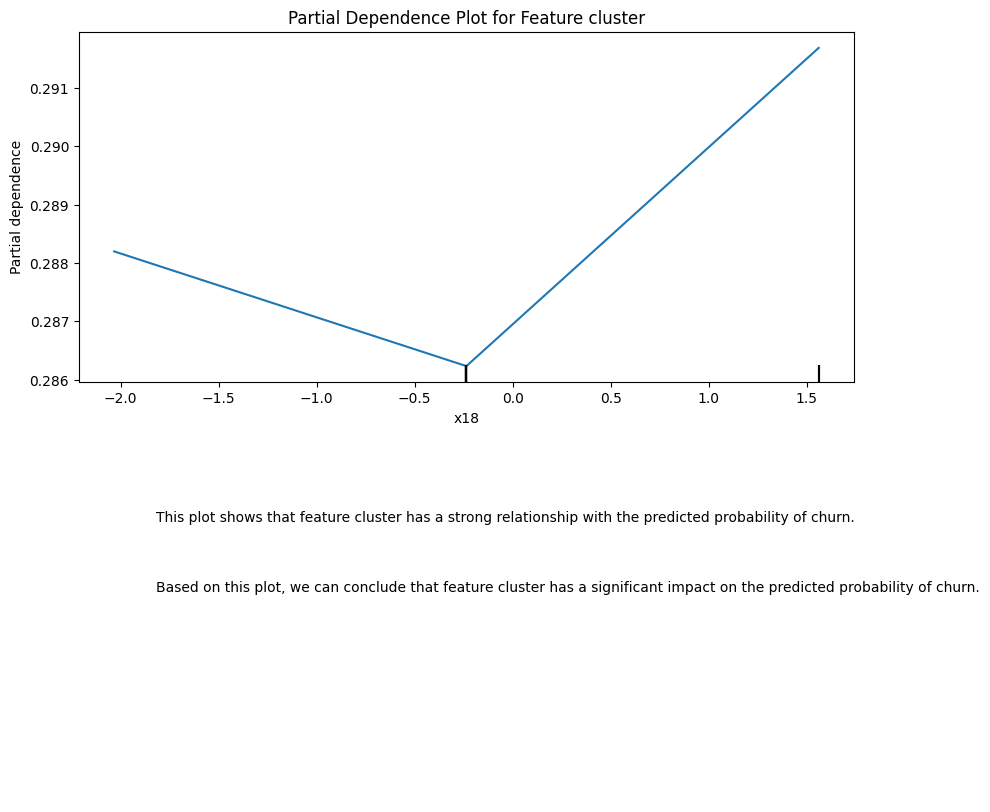

In [118]:
from sklearn.inspection import PartialDependenceDisplay, partial_dependence
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)


import matplotlib.backends.backend_pdf
pdf = matplotlib.backends.backend_pdf.PdfPages("pdp_analysis.pdf")


# Perform PDP analysis
features = list(range(X_train.shape[1]))  # Get the number of features in X_train
import matplotlib.backends.backend_pdf
pdf = matplotlib.backends.backend_pdf.PdfPages("pdp_analysis.pdf")
names = X_train.columns

for feature in features:
    fig, axs = plt.subplots(2, 1, figsize=(10, 10))
    dep = partial_dependence(rf, X_train_scaled, [feature], percentiles=(0.05, 0.95))

    pdp, axes = dep.keys()

    display = PartialDependenceDisplay.from_estimator(rf, X_train_scaled, [feature], percentiles=(0.05, 0.95))
    display.plot(ax=axs[0])
    axs[0].set_title(f'Partial Dependence Plot for Feature {names[feature]}')
    axs[0].set_xlabel('Feature Value')
    axs[0].set_ylabel('Predicted Probability')
    axs[1].axis('off')

    # Check if the feature has a significant impact
    max_val = dep['grid_values'][0].max()
    min_val = dep['grid_values'][0].min()
    
    steepness = (max_val - min_val) / abs((max_val + min_val) / 2)

    if steepness > 0.5:  # Adjust this threshold as needed
        comment = f"This plot shows that feature {names[feature]} has a strong relationship with the predicted probability of churn."
        conclusion = f"Based on this plot, we can conclude that feature {names[feature]} has a significant impact on the predicted probability of churn."
    else:
        comment = f"This plot shows that feature {names[feature]} does not have a strong relationship with the predicted probability of churn."
        conclusion = "This suggests that feature is not an important factor in determining the predicted probability of churn."

    axs[1].text(0.1, 0.8, comment, fontsize=10)
    axs[1].text(0.1, 0.6, conclusion, fontsize=10)


    # axs[1].text(0.1, 0.8, f'Comment: This plot shows the relationship between feature {feature} and the predicted probability of churn.', fontsize=12)
    # axs[1].text(0.1, 0.6, f'Conclusion: Based on this plot, we can conclude that feature {feature} has a significant impact on the predicted probability of churn.', fontsize=12)
    
    pdf.savefig(fig, bbox_inches='tight')
    plt.close()


pdf.close()

In [106]:
axes

'average'

In [ ]:
display.

array([[None]], dtype=object)